<a href="https://colab.research.google.com/github/juyeon-shin/CLUB-D.N.A./blob/main/2022/01.%20%ED%8E%AD%EA%B7%84%20%EB%AA%B8%EB%AC%B4%EA%B2%8C%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/01_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%26_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 0.데이터 불러오기 & 패키지 불러오기
#### 데이터 설명
+ id : 샘플 아이디   
+ Species: 펭귄의 종을 나타내는 문자열   
+ Island : 샘플들이 수집된 Palmer Station 근처 섬 이름   
+ Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기    
+ Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이    
+ Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이    
+ Flipper Length (mm) : 펭귄의 팔(날개) 길이    
+ Sex : 펭귄의 성별    
+ Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율    
+ Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율    
+ Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
data = pd.read_csv('/content/drive/MyDrive/2022/202201 펭귄 몸무게 예측 경진대회/데이터/train.csv')
#data = data.drop(['id'],axis=1)
data.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [157]:
null_df = data[data['Sex'].isnull()]
null_df

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650


In [172]:
#data[data['Species']]
group_S = data.groupby(['Species']).mean()
group_S

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Species,,,,,,,
Adelie Penguin (Pygoscelis adeliae),52.097561,38.812195,18.363415,189.658537,8.872972,-25.826948,3801.219512
Chinstrap penguin (Pygoscelis antarctica),56.120000,48.384000,18.396000,196.080000,9.417314,-24.515760,3756.000000
Gentoo penguin (Pygoscelis papua),60.458333,47.604167,15.143750,218.125000,8.276492,-26.269597,5075.520833


In [173]:
group_D5 = data.groupby(['Island']).mean()
group_D5#['Delta 15 N (o/oo)']

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Island,,,,,,,
Biscoe,58.631579,46.184211,15.614035,213.842105,8.383148,-26.213324,4878.947368
Dream,55.772727,44.297727,18.379545,192.636364,9.237308,-24.997817,3764.772727
Torgersen,49.615385,38.792308,18.538462,191.000000,8.621243,-26.017551,3817.307692


### 01. 데이터 탐색
#### 1-1. 결측값 확인 & 기초통계량 확인

In [ ]:
#데이터 확인 & 결측값 확인 & 범주형 변수 값 보기

def data_info (data):
  print('데이터 타입 확인\n',data.dtypes)
  print('\n결측값 확인\n',data.isnull().sum())
  print('\n범주형 변수')
  for i in data.columns:
    if data[i].dtypes == 'object' :
      print('\n',i,'\n',data[i].unique())

  return 

data_info(data)

데이터 타입 확인
 id                       int64
Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

결측값 확인
 id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

범주형 변수

 Species 
 ['Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Adelie Penguin (Pygoscelis adeliae)']

 Island 
 ['Biscoe' 'Dream' 'Torgersen']

 Clutch Completion 
 ['Yes' 'No']

 Sex 
 ['MALE' 'FEMALE' nan]


In [ ]:
data.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


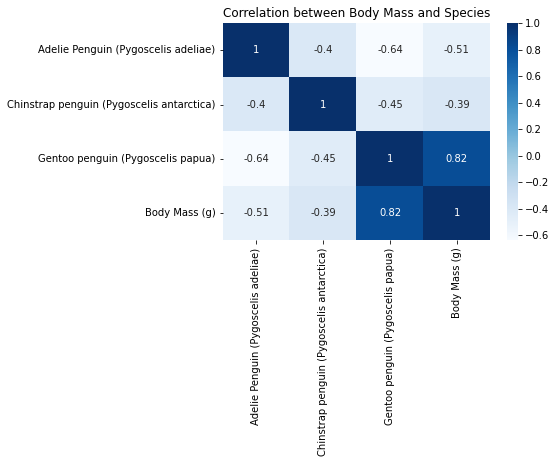

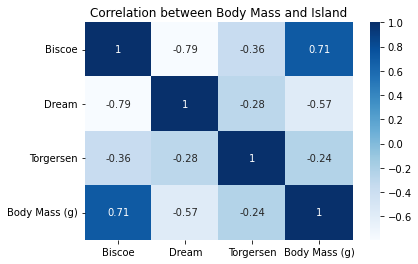

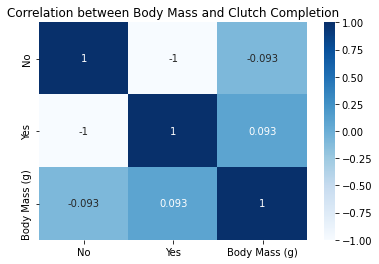

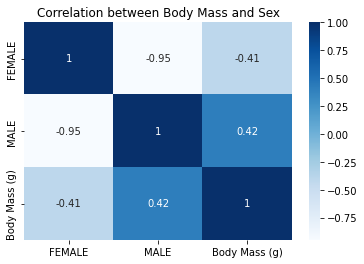

In [84]:
# 범주형 변수의 상관관계
for i in data.columns:
  if data[i].dtypes == 'object':
    Sp = pd.get_dummies(data[i])
    Sp['Body Mass (g)'] = data['Body Mass (g)'] 
    sns.heatmap(Sp.corr(),cmap='Blues',annot=True)
    plt.title('Correlation between Body Mass and %s'%i)
    plt.show()

#### 1-2. EDA 확인

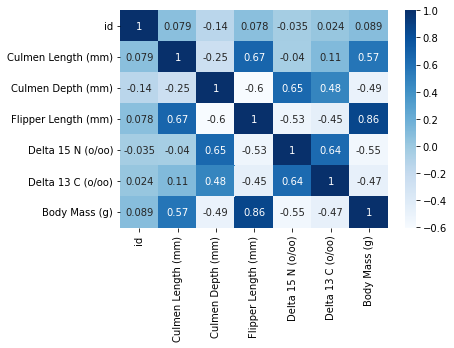

In [ ]:
#수치형 변수 상관관계
sns.heatmap(data.corr(),cmap='Blues',annot=True)

+ Body Mass(g)와 관련이 높은 수치형 변수는 Flipper Length (mm)이다

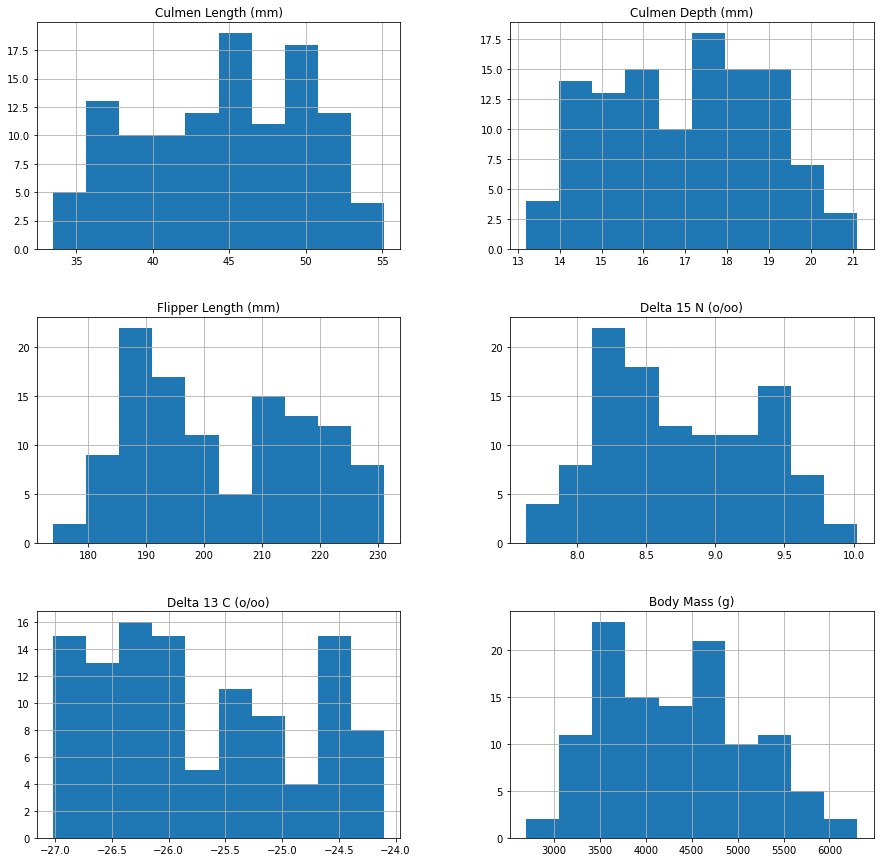

In [108]:
data.hist(bins=10,figsize = (15,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


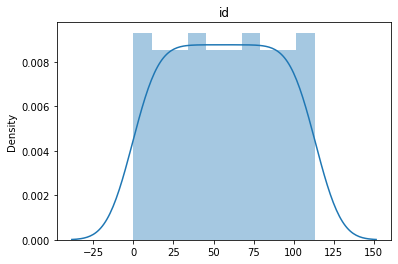

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


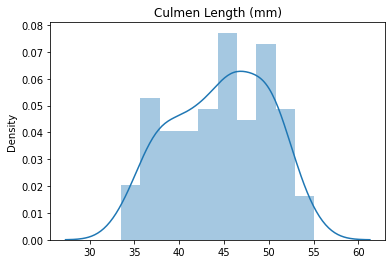

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


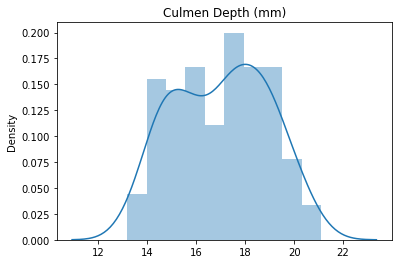

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


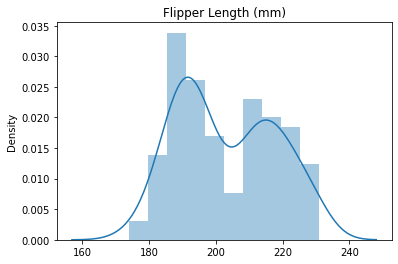

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


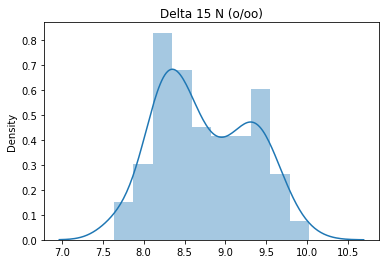

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


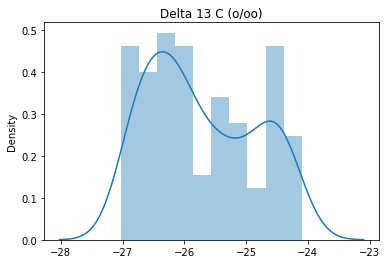

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


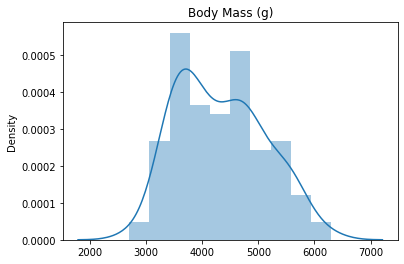

In [75]:
for i in data.columns:
  if data[i].dtypes != 'object':
    sns.distplot(data,x = data[i],bins=10)
    plt.title(i)
    plt.show()

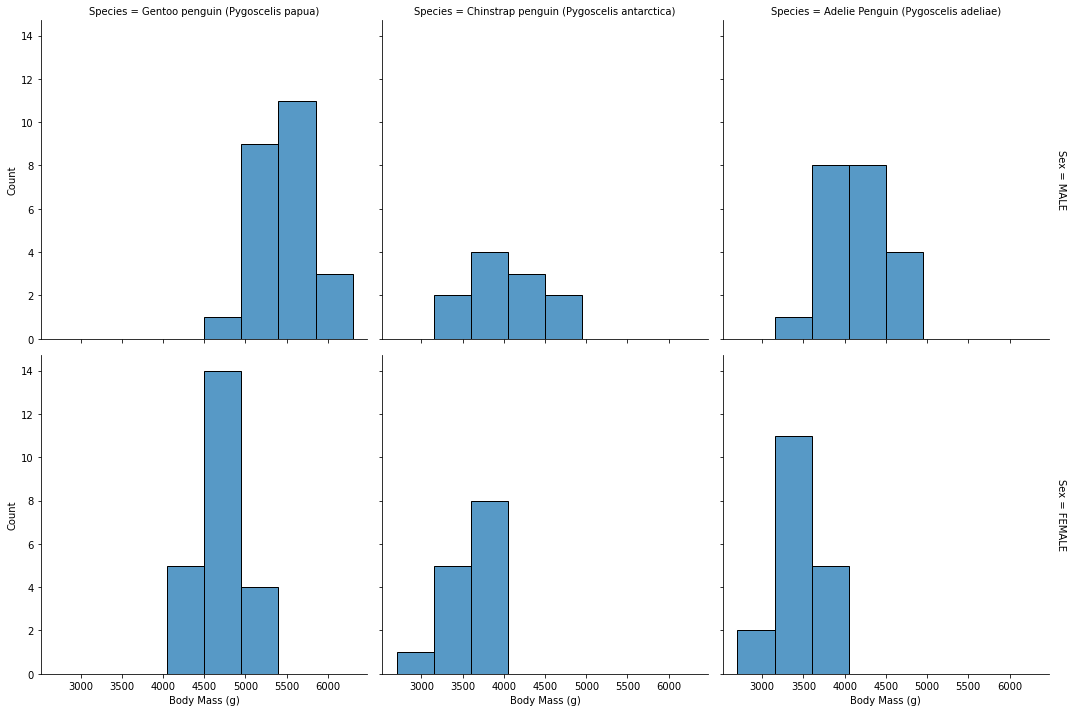

In [105]:
sns.displot(data, x='Body Mass (g)', col="Species", row="Sex",facet_kws=dict(margin_titles=True))

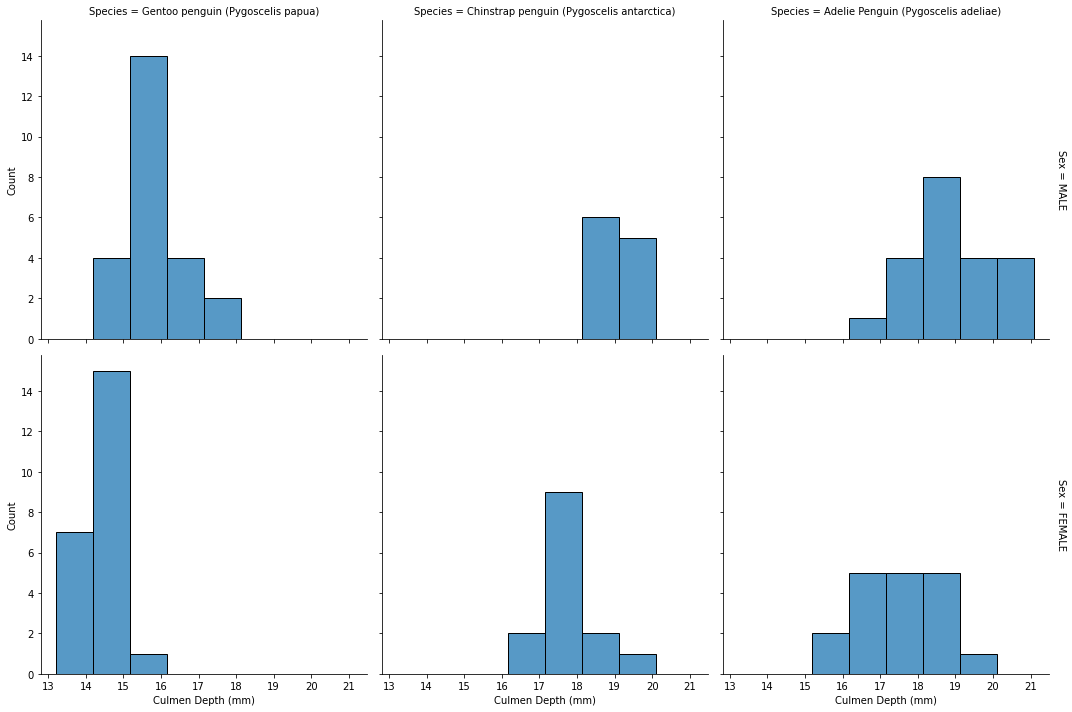

In [109]:
sns.displot(data, x='Culmen Depth (mm)', col="Species", row="Sex",facet_kws=dict(margin_titles=True))

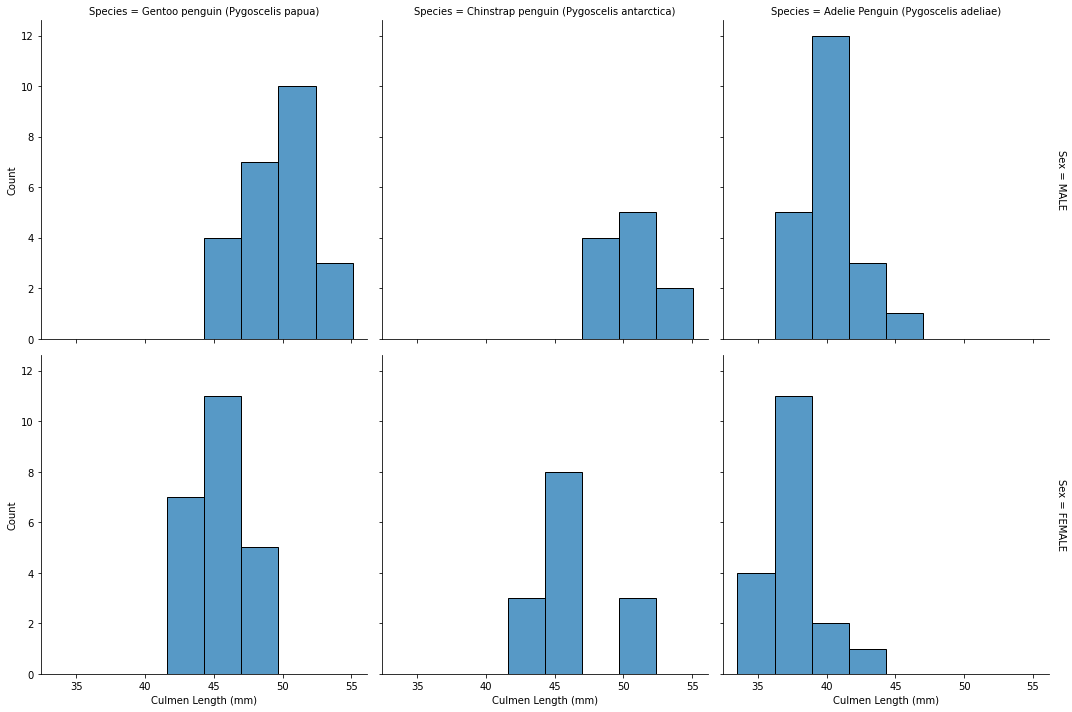

In [110]:
sns.displot(data, x='Culmen Length (mm)', col="Species", row="Sex",facet_kws=dict(margin_titles=True))

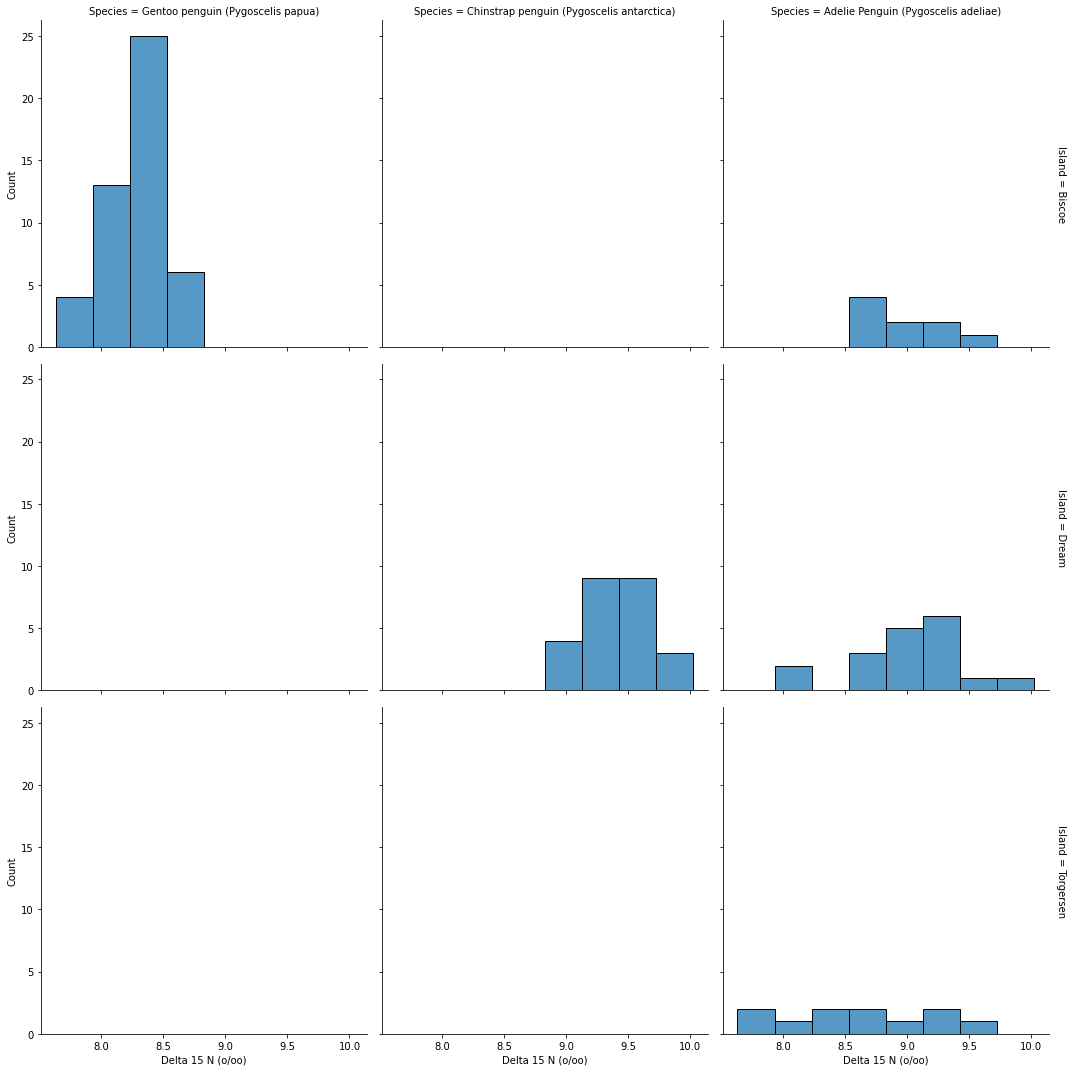

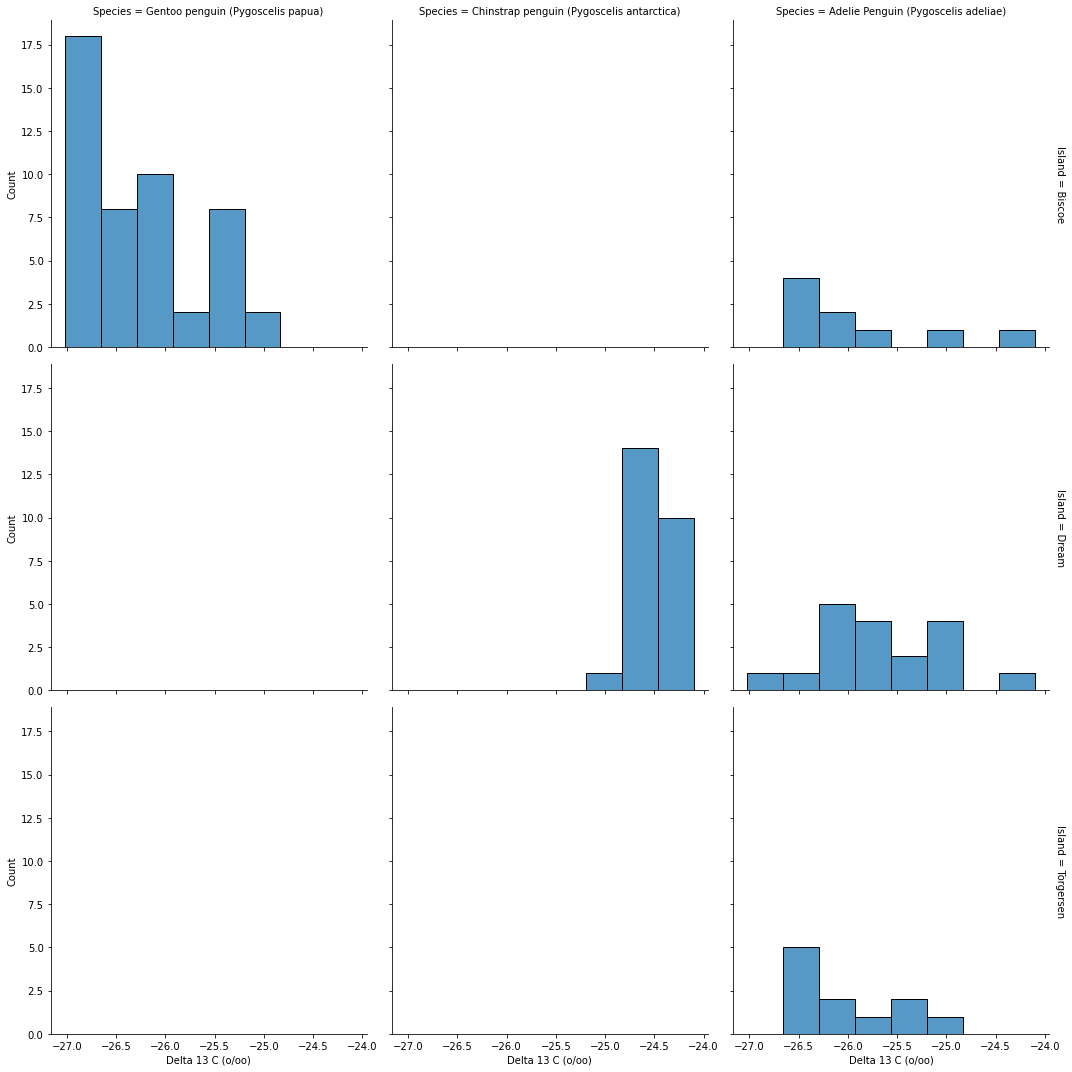

In [121]:
sns.displot(data, x='Delta 15 N (o/oo)', col="Species", row="Island",facet_kws=dict(margin_titles=True))

sns.displot(data, x='Delta 13 C (o/oo)', col="Species", row="Island",facet_kws=dict(margin_titles=True))


In [152]:
def EDA_obj (data):
  colors = sns.color_palette("Blues")
  for i in data.columns:
    if data[i].dtypes == 'object':
      group_data = data.groupby([i],as_index=False).count()
      sns.barplot(x =i,y = 'Body Mass (g)',data = group_data ,palette='Blues')
      plt.title('%s barplot'%i)
      plt.xticks(rotation=45)
      plt.show()

      plt.pie(group_data['Body Mass (g)']/100, labels=group_data[i], autopct='%.1f%%', colors = colors)
      plt.title('%s pie plot'%i)
      plt.show()

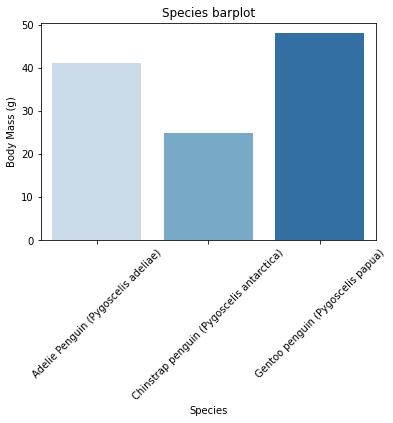

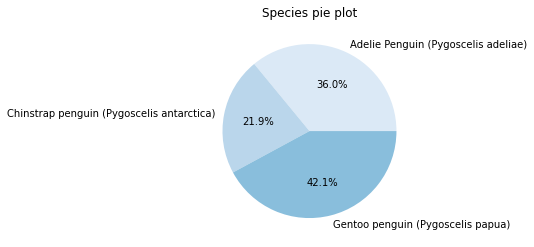

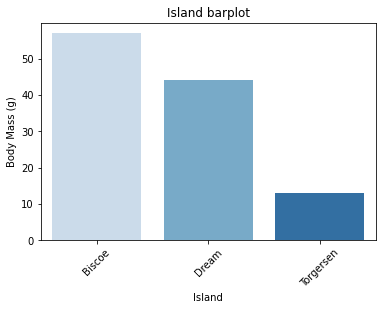

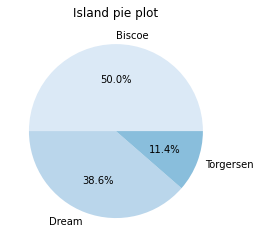

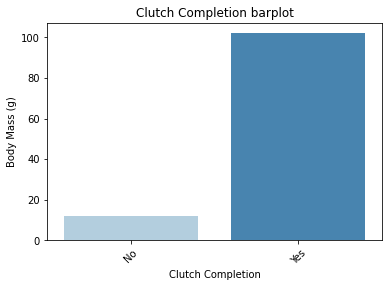

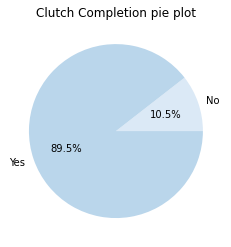

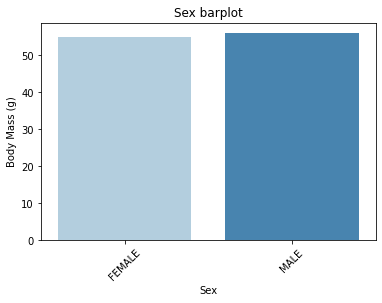

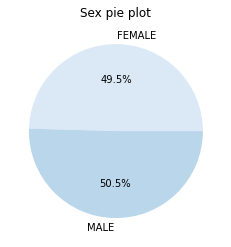

In [153]:
EDA_obj(data)

In [133]:
group_data = data.groupby(['Species'],as_index=False).count()
group_data 


,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),41,41,41,41,41,39,38,38,41
1,Chinstrap penguin (Pygoscelis antarctica),25,25,25,25,25,25,25,25,25
2,Gentoo penguin (Pygoscelis papua),48,48,48,48,48,47,48,48,48


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

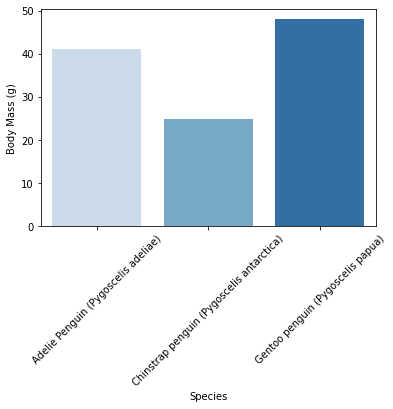

In [138]:
sns.barplot(x ='Species',y = 'Body Mass (g)',data = group_data ,palette='Blues')
plt.xticks(rotation=45)

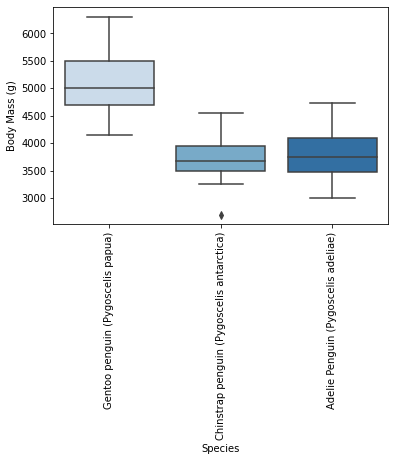

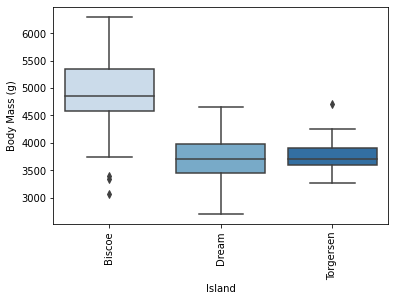

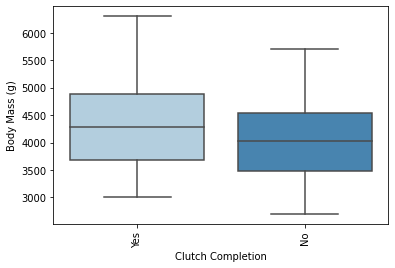

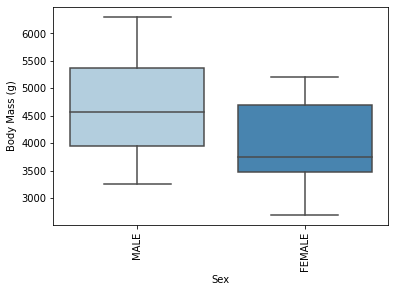

In [104]:
for i in data.columns:
  if data[i].dtypes == 'object':
    sns.boxplot(x = i ,y='Body Mass (g)',data=data, palette='Blues')
    plt.xticks(rotation=90)
    plt.show()